In [15]:
import cv2
import numpy as np
from skimage.feature import hog
from skimage import io, exposure
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.datasets import cifar10
from skimage.color import rgb2gray
from skimage.transform import resize

## Визначення границь та кутів зображення за допомогою фільтру Собеля

In [3]:
# Завантажте зображення
image = cv2.imread('image12.jpg', cv2.IMREAD_GRAYSCALE)

# Визначення фільтрів Собеля
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)

# Обчислення магнітуди та кута градієнту
gradient_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
gradient_angle = np.arctan2(sobel_y, sobel_x) * (180 / np.pi)

# Перетворення магнітуди на значення від 0 до 255
gradient_magnitude = cv2.convertScaleAbs(gradient_magnitude)

# Відображення границь та кутів
cv2.imshow('Gradient Magnitude', gradient_magnitude)
cv2.imshow('Gradient Angle', gradient_angle)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Метод густини градієнта HOG для витягування ознак зображення

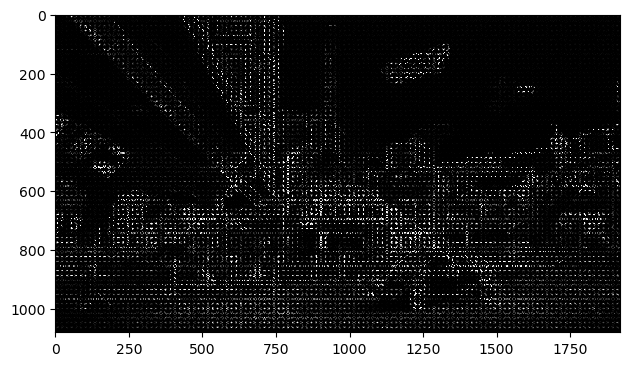

In [5]:
# Обчислення HOG ознак
# Параметри: (зображення, кількість орієнтацій градієнту, розмір клітини, розмір блоку)
# Рекомендовані значення параметрів можна змінювати відповідно до вашої задачі
features, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualize=True)

# Нормалізація HOG ознак для поліпшення візуалізації
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

# Відображення HOG ознак та зображення
io.imshow(hog_image_rescaled)
io.show()

## Завантаження датасету cifar-10 та використання HOG для витягування ознак зображення. 

In [12]:
# Завантаження датасету CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Конвертування зображень у відтінки сірого
x_train_gray = np.array([rgb2gray(image) for image in x_train])

# Витягування ознак HOG для тренувального датасету
x_train_hog = []
for image in x_train_gray:
    features = hog(image, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1))
    x_train_hog.append(features)
x_train_hog = np.array(x_train_hog)

# Розділення на тренувальні та валідаційні набори
x_train_hog, x_val_hog, y_train, y_val = train_test_split(x_train_hog, y_train, test_size=0.2, random_state=42)

# Класифікація з використанням SVM
clf = SVC()
clf.fit(x_train_hog, y_train)

# Прогнозування на валідаційному наборі
y_pred = clf.predict(x_val_hog)

C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [11]:
# Обчислення метрик для HOG
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred, average='macro')
recall = recall_score(y_val, y_pred, average='macro')
f1 = f1_score(y_val, y_pred, average='macro')

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')

Accuracy: 0.3729
Precision: 0.3721
Recall: 0.3736
F1-score: 0.3643


## Використання методу SIFT для витягування ознак з зображення

In [ ]:
# Витягування ознак SIFT для тренувального датасету
x_train_sift = []
y_train_sift = []
sift = cv2.SIFT_create()
for image, label in zip(x_train, y_train):
    gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    keypoints, descriptors = sift.detectAndCompute(gray_image, None)
    if descriptors is not None:
        x_train_sift.extend(descriptors)
        y_train_sift.extend([label] * descriptors.shape[0])

# Конвертація в numpy arrays
x_train_sift = np.array(x_train_sift)
y_train_sift = np.array(y_train_sift)

# Розділення на тренувальні та валідаційні набори
x_train_sift, x_val_sift, y_train_sift, y_val_sift = train_test_split(x_train_sift, y_train_sift, test_size=0.2, random_state=42)

# Класифікація з використанням SVM для SIFT
clf_sift = SVC()
clf_sift.fit(x_train_sift, y_train_sift)

# Прогнозування на валідаційному наборі для SIFT
y_pred_sift = clf_sift.predict(x_val_sift)

C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# Обчислення метрик для SIFT
accuracy_sift = accuracy_score(y_val_sift, y_pred_sift)
precision_sift = precision_score(y_val_sift, y_pred_sift, average='macro')
recall_sift = recall_score(y_val_sift, y_pred_sift, average='macro')
f1_sift = f1_score(y_val_sift, y_pred_sift, average='macro')

print(f'Accuracy: {accuracy_sift:.4f}')
print(f'Precision: {precision_sift:.4f}')
print(f'Recall: {recall_sift:.4f}')
print(f'F1-score: {f1_sift:.4f}')